In [16]:
import numpy as np
import matplotlib.pyplot as plt

from matplotlib import rc, patches

rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
rc('text', usetex=True)

In [9]:
%matplotlib inline

In [13]:
npoints = 1024

np.random.seed(11)

x = np.random.randn(npoints)
y = np.random.randn(npoints)
xy = np.column_stack([x,y])

mux,sigmax = np.mean(x), np.std(x)
muy,sigmay = np.mean(y), np.std(y)

print "mux,sigmax = ", mux,sigmax
print "muy,sigmay = ", muy,sigmay

print xy.shape

mux,sigmax =  -0.00393621189228 1.01625195109
muy,sigmay =  0.0243904643098 1.00235174845
(1024, 2)


In [11]:
covxy = np.cov(xy.T)
covxy

array([[ 1.03377758,  0.00211703],
       [ 0.00211703,  1.00569115]])

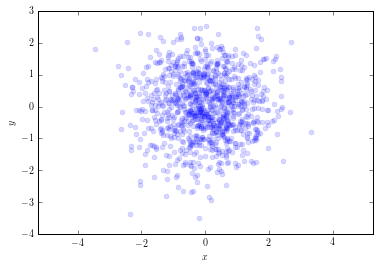

In [12]:
plt.plot(x,y,'.',alpha=0.16,ms=10);
plt.xlabel('$x$');
plt.ylabel('$y$');
plt.axis('equal');

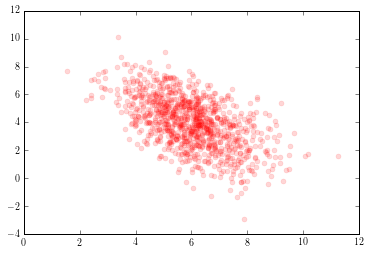

In [14]:
mux_, muy_ = 6,4
sigmax_, sigmay_ = 2,1
theta = 120*np.pi/180.0

x_ = mux_ + np.cos(theta)*sigmax_*x - np.sin(theta)*sigmay_*y
y_ = muy_ + np.sin(theta)*sigmax_*x + np.cos(theta)*sigmay_*y

plt.plot(x_,y_,'.r',alpha=0.16,ms=10)

In [19]:
def shadedEllipse(x,y,a,b,theta,col,alp):
    ell = patches.Ellipse((x,y),a,b,theta)
    ell.set_alpha(alp)
    ell.set_facecolor(col)
    ell.set_edgecolor(col)
    return ell

In [25]:
#plt.axis?

[-5, 5, -5, 5]

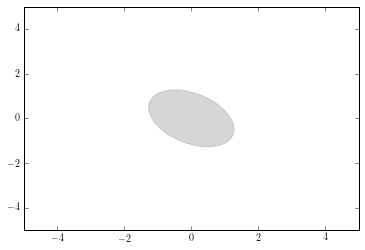

In [26]:
plt.gca().add_artist( shadedEllipse(0., 0., 2., 3., 45., (0.6, 0.6, 0.6), 0.4) )
plt.axis([-5,5,-5,5])

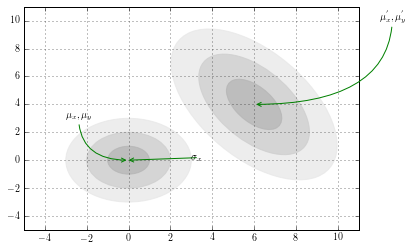

In [31]:
shades = [(0.9,)*3,(0.8,)*3,(0.7,)*3]
radii = [3,2,1]
alp = 0.7
for i in range(3):
    ell1 = shadedEllipse(0,0,1*radii[i]*2,1*radii[i]*2,0,shades[i],alp)
    ell2 = shadedEllipse(mux_,muy_,sigmax_*radii[i]*2,sigmay_*radii[i]*2,theta*180.0/np.pi,shades[i],alp)   
    
    plt.gca().add_artist( ell1 )
    plt.gca().add_artist( ell2 )
    
plt.axis([-5,11,-5,11])    

plt.annotate("$\mu_x,\mu_y$", (0,0), (-3,3), size=10,
             arrowprops=dict(arrowstyle="->",
                             fc=(1,1,0), ec="green",
                             patchB=None,
                             connectionstyle="angle3,angleA=-90,angleB=0"))
                         
plt.annotate("$\mu_x^{'},\mu_y^{'}$", (mux_,muy_), (mux_+6,muy_+6), size=10,
             arrowprops=dict(arrowstyle="->",                         
                             fc=(1,1,0), ec="green",
                             patchB=None,
                             connectionstyle="angle3,angleA=-90,angleB=0"))                         
                         
plt.annotate("$\sigma_x$",xycoords='data',textcoords='data',
             xy=(0,0),xytext=(3.0,0.0),size=10,
             annotation_clip=False,
             arrowprops=dict(arrowstyle="->", fc=(1,1,0), ec="green",patchA=None,patchB=None,shrinkA=0.,shrinkB=0.))

plt.grid()
plt.savefig('plt1.pdf')

In [ ]:
#grid(xdata=range(-5,10,1))
#xlim(-5,10)
#ylim(-5,10)
#xticks(range(-5,10,1))
#yticks(range(-5,10,1))


In [33]:
import scipy
import scipy.special

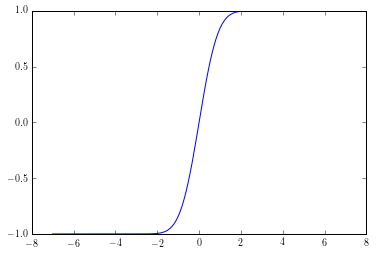

In [36]:
x = np.arange(-7., 7., 0.1)
plt.plot(x,scipy.special.erf(x))